### Building Basic LeNet for MNIST
    1. Make sure to run the helper functions first

In [4]:
## PIP INSTALLs

In [1]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 86B0-AFDD

 Directory of C:\Users\Baron\Desktop\EE_297_Repo\EE_297\ML_PATH_EE297\EE297_env\projects

04/07/2025  12:38 AM    <DIR>          .
04/07/2025  12:38 AM    <DIR>          ..
04/07/2025  12:21 AM    <DIR>          .ipynb_checkpoints
03/22/2025  11:41 PM    <DIR>          Archive
04/04/2025  11:24 PM             7,055 img_5.txt
04/07/2025  12:38 AM            91,517 Lenet Design.ipynb
04/04/2025  08:27 PM            42,485 lenet_model.png
04/05/2025  11:49 PM    <DIR>          models
04/06/2025  11:13 PM    <DIR>          prelims
04/07/2025  12:21 AM    <DIR>          weights
               3 File(s)        141,057 bytes
               7 Dir(s)  164,630,929,408 bytes free


In [2]:
pwd

'C:\\Users\\Baron\\Desktop\\EE_297_Repo\\EE_297\\ML_PATH_EE297\\EE297_env\\projects'

In [3]:
# Main Imports
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from IPython.display import Image
import numpy as np

C:\Users\Baron\anaconda3\Lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.14.2 when it was built against 1.14.5, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
C:\Users\Baron\anaconda3\Lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.14.2 when it was built against 1.14.5, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
C:\Users\Baron\anaconda3\Lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.14.2 when it was built against 1.14.5, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
C:\Users\Baron\anaconda3\Lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.14.2 when it was built against 1.14.5, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
C:\Users\Bar

In [4]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
tf.keras.backend.set_floatx('float32')
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [13]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

In [14]:
# Preprocess data
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

#For Confusion Matrix
y_test_raw = y_test

# Convers the output data to categorical Data.
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

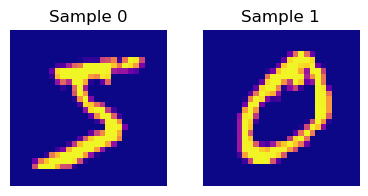

In [15]:
show_sample_images(x_train, 2)

In [43]:
# Build LeNet model with explicit dtype
model = models.Sequential([
    layers.Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1),
                  padding='same', dtype='float32'),
    layers.MaxPooling2D(pool_size=(2, 2), dtype='float32'),
    layers.Conv2D(16, kernel_size=(5, 5), activation='relu', dtype='float32'),
    layers.MaxPooling2D(pool_size=(2, 2), dtype='float32'),
    layers.Flatten(dtype='float32'),
    layers.Dense(120, activation='relu', dtype='float32'),
    layers.Dense(84, activation='relu', dtype='float32'),
    layers.Dense(10, activation='softmax', dtype='float32')
])

In [44]:
#plot_model(model, to_file='lenet_model.png', show_shapes=True, show_layer_names=True)

In [45]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [46]:
# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 9s 20ms/step - loss: 0.3117 - accuracy: 0.9093 - val_loss: 0.0906 - val_accuracy: 0.9758
Epoch 2/10
422/422 [==============================] - 8s 19ms/step - loss: 0.0832 - accuracy: 0.9742 - val_loss: 0.0704 - val_accuracy: 0.9815
Epoch 3/10
422/422 [==============================] - 8s 19ms/step - loss: 0.0586 - accuracy: 0.9815 - val_loss: 0.0530 - val_accuracy: 0.9862
Epoch 4/10
422/422 [==============================] - 8s 20ms/step - loss: 0.0475 - accuracy: 0.9851 - val_loss: 0.0506 - val_accuracy: 0.9882
Epoch 5/10
422/422 [==============================] - 8s 19ms/step - loss: 0.0394 - accuracy: 0.9874 - val_loss: 0.0423 - val_accuracy: 0.9877
Epoch 6/10
422/422 [==============================] - 8s 19ms/step - loss: 0.0344 - accuracy: 0.9889 - val_loss: 0.0460 - val_accuracy: 0.9877
Epoch 7/10
422/422 [==============================] - 8s 20ms/step - loss: 0.0273 - accuracy: 0.9912 - val_loss: 0.0415 - val_accuracy: 0.9895

In [47]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

313/313 [==============================] - 1s 4ms/step - loss: 0.0366 - accuracy: 0.9886
Test accuracy: 0.9886


313/313 [==============================] - 1s 4ms/step


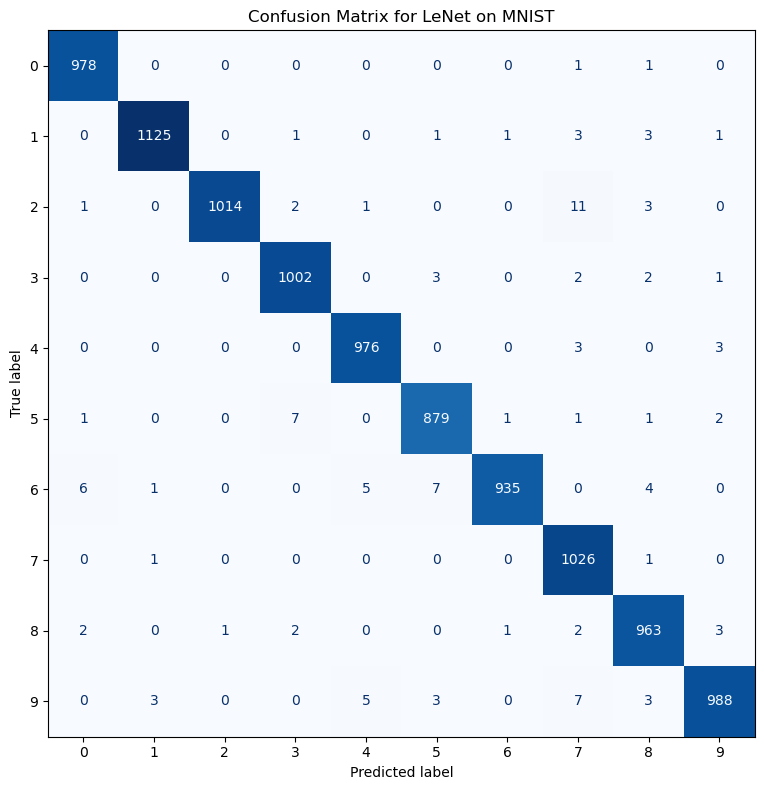

In [48]:
#Confusion Matrix
# Predict on test set
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Use y_test (not y_test_cat) for the confusion matrix
cm = confusion_matrix(y_test_raw, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))

# Display it
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(ax=ax, cmap='Blues', colorbar=False)
plt.title("Confusion Matrix for LeNet on MNIST")
plt.tight_layout()
#plt.show()

In [49]:
for layer in model.layers:
    has_weights = "✅" if layer.get_weights() else "❌"
    print(f"{layer.name:20s} | Has weights? {has_weights}")

conv2d_2             | Has weights? ✅
max_pooling2d        | Has weights? ❌
conv2d_3             | Has weights? ✅
max_pooling2d_1      | Has weights? ❌
flatten_1            | Has weights? ❌
dense_3              | Has weights? ✅
dense_4              | Has weights? ✅
dense_5              | Has weights? ✅


In [50]:
# Extract The Weights
x = 0
for layer in model.layers:
    if layer.get_weights():
        print(x)
        w, b = layer.get_weights()
        print(f"{layer.name} weights shape: {w.shape}")
        print(f"{layer.name} biases shape: {b.shape}")
        x+=1

0
conv2d_2 weights shape: (5, 5, 1, 6)
conv2d_2 biases shape: (6,)
1
conv2d_3 weights shape: (5, 5, 6, 16)
conv2d_3 biases shape: (16,)
2
dense_3 weights shape: (400, 120)
dense_3 biases shape: (120,)
3
dense_4 weights shape: (120, 84)
dense_4 biases shape: (84,)
4
dense_5 weights shape: (84, 10)
dense_5 biases shape: (10,)


In [51]:

#layers.Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1), padding='same', dtype='float32')
weights = model.get_weights()
conv1_weights = weights[0]
conv1_biases = weights[1]

conv2_weights = weights[2]
conv2_biases = weights[3]

fc1_weights = weights[4]
fc1_biases = weights[5]

fc2_weights = weights[6]
fc2_biases = weights[7]

fc3_weights = weights[8]
fc3_biases = weights[9]

#print(conv1_weights)

In [52]:
#Convert the current weights and biases to header files for HLS env
import numpy as np

# Load trained weights
conv1_weights = weights[0]  # shape: (6, 5, 1, 6)
                            # shape: (i, j, 1, k)   (For the for loops)                         
conv1_biases = weights[1]   # shape: (6,)

# Manually save the weights as c header files: 
# Export as C header
## ---------------------------- ** CONV1 ** ---------------------------------------
with open("weights/conv1_weights.h", "w") as f:
    f.write('#include "C:\\Users\\Baron\\Desktop\\EE_297_Repo\\EE_297\\vivado\\lenet_proj\\lenet_top.h"\n\n') 
    f.write("float conv1_weights[5][5][1][6] = {\n")
    for i in range(5):
        f.write("  {\n")
        for j in range(5):
            f.write("    {")
            f.write(", ".join(f"{conv1_weights[i][j][0][k]:.8f}" for k in range(6)))
            f.write("},\n")
        f.write("  },\n")
    f.write("};\n")

with open("weights/conv1_biases.h", "w") as f:
    f.write('#include "C:\\Users\\Baron\\Desktop\\EE_297_Repo\\EE_297\\vivado\\lenet_proj\\lenet_top.h"\n\n') 
    f.write("float conv1_biases[6] = {")
    f.write(", ".join(f"{b:.8f}" for b in conv1_biases))
    f.write("};\n")
## ---------------------------- ** COVN2 ** ---------------------------------------
# Load trained weights
conv2_weights = weights[2]  # shape: (6, 5, 1, 6)
                            # shape: (i, j, 1, k)   (For the for loops)                         
conv2_biases = weights[3]   # shape: (6,)

# Save conv2_weights: shape (5, 5, 6, 16)
with open("weights/conv2_weights.h", "w") as f:
    f.write('#include "C:\\Users\\Baron\\Desktop\\EE_297_Repo\\EE_297\\vivado\\lenet_proj\\lenet_top.h"\n\n') 
    f.write("float conv2_weights[5][5][6][16] = {\n")
    for i in range(5):
        f.write("  {\n")
        for j in range(5):
            f.write("    {\n")
            for k in range(6):
                line = "      {" + ", ".join(f"{conv2_weights[i][j][k][m]:.8f}" for m in range(16)) + "},\n"
                f.write(line)
            f.write("    },\n")
        f.write("  },\n")
    f.write("};\n")

# Save conv2_biases: shape (16,)
with open("weights/conv2_biases.h", "w") as f:
    f.write('#include "C:\\Users\\Baron\\Desktop\\EE_297_Repo\\EE_297\\vivado\\lenet_proj\\lenet_top.h"\n\n') 
    f.write("float conv2_biases[16] = {")
    f.write(", ".join(f"{b:.8f}" for b in conv2_biases))
    f.write("};\n")
## ---------------------------- ** FC1 ** ---------------------------------------
fc1_weights = weights[4]

fc1_biases = weights[5]

# Save fc1_weights: shape (400, 120)
with open("weights/fc1_weights.h", "w") as f:
    f.write('#include "C:\\Users\\Baron\\Desktop\\EE_297_Repo\\EE_297\\vivado\\lenet_proj\\lenet_top.h"\n\n') 
    f.write("float fc1_weights[400][120] = {\n")
    for i in range(400):
        f.write("  {" + ", ".join(f"{fc1_weights[i][j]:.8f}" for j in range(120)) + "},\n")
    f.write("};\n")

# Save fc1_biases: shape (120,)
with open("weights/fc1_biases.h", "w") as f:
    f.write('#include "C:\\Users\\Baron\\Desktop\\EE_297_Repo\\EE_297\\vivado\\lenet_proj\\lenet_top.h"\n\n') 
    f.write("float fc1_biases[120] = {")
    f.write(", ".join(f"{b:.8f}" for b in fc1_biases))
    f.write("};\n")

## ---------------------------- ** FC2 ** ---------------------------------------
fc2_weights = weights[6]

fc2_biases = weights[7]

# Save fc2_weights: shape (120, 84)
with open("weights/fc2_weights.h", "w") as f:
    f.write('#include "C:\\Users\\Baron\\Desktop\\EE_297_Repo\\EE_297\\vivado\\lenet_proj\\lenet_top.h"\n\n') 
    f.write("float fc2_weights[120][84] = {\n")
    for i in range(120):
        f.write("  {" + ", ".join(f"{fc2_weights[i][j]:.8f}" for j in range(84)) + "},\n")
    f.write("};\n")

# Save fc2_biases: shape (84,)
with open("weights/fc2_biases.h", "w") as f:
    f.write('#include "C:\\Users\\Baron\\Desktop\\EE_297_Repo\\EE_297\\vivado\\lenet_proj\\lenet_top.h"\n\n') 
    f.write("float fc2_biases[84] = {")
    f.write(", ".join(f"{b:.8f}" for b in fc2_biases))
    f.write("};\n")

## ---------------------------- ** FC3 ** ---------------------------------------
fc3_weights = weights[8]

fc3_biases = weights[9]
    
# Save fc3_weights: shape (84, 10)
with open("weights/fc3_weights.h", "w") as f:
    f.write('#include "C:\\Users\\Baron\\Desktop\\EE_297_Repo\\EE_297\\vivado\\lenet_proj\\lenet_top.h"\n\n') 
    f.write("float fc3_weights[84][10] = {\n")
    for i in range(84):
        f.write("  {" + ", ".join(f"{fc3_weights[i][j]:.8f}" for j in range(10)) + "},\n")
    f.write("};\n")

# Save fc3_biases: shape (10,)
with open("weights/fc3_biases.h", "w") as f:
    f.write('#include "C:\\Users\\Baron\\Desktop\\EE_297_Repo\\EE_297\\vivado\\lenet_proj\\lenet_top.h"\n\n') 
    f.write("float fc3_biases[10] = {")
    f.write(", ".join(f"{b:.8f}" for b in fc3_biases))
    f.write("};\n")

In [53]:
# Save the newly created model to the side.
# Save the trained model to an HDF5 file
model.save('models/model_lenet.h5py')

INFO:tensorflow:Assets written to: models/model_lenet.h5py\assets


INFO:tensorflow:Assets written to: models/model_lenet.h5py\assets


In [6]:
## First layer:
from tensorflow.keras.models import load_model
model = tf.keras.models.load_model('models/model_lenet.h5py')

# Load the test image (if from txt file used in HLS)
image = np.loadtxt("img_5.txt")  # or whatever index you're using
image = image.reshape(1, 28, 28, 1)  # Add batch and channel dimensions

layer_output_model = tf.keras.Model(inputs=model.input, outputs=model.layers[0].output)

# Get the output
conv1_output = layer_output_model.predict(image)

with open("prelims/conv1_out.txt", "w") as f:
    for filt in range(6):
        #f.write(f"==== Feature Map for Filter {filt} ====\n")
        for i in range(28):
            for j in range(28):
                f.write(f"{conv1_output[0, i, j, filt]:.6f} ")
            f.write("\n")
        f.write("\n")

#-----------------------------------------------------------------------------
## FIXED PRECISION

# Load the model
#model = tf.keras.models.load_model('models/model_lenet.h5py')
#
## Load and reshape the input image
#image = np.loadtxt("img_5.txt").reshape(1, 28, 28, 1)
#
## Extract output from the first Conv2D layer
#layer_output_model = tf.keras.Model(inputs=model.input, outputs=model.layers[0].output)
#conv1_output = layer_output_model.predict(image)  # shape (1, 28, 28, 6)
#
## Simulate ap_fixed<16, 8>
#def to_ap_fixed_16_8(x):
#    x_scaled = np.round(x * 256)  # simulate fixed-point rounding
#    x_clipped = np.clip(x_scaled, -32768, 32767)  # 16-bit signed range
#    return x_clipped / 256.0  # back to float for readability/comparison
#
## Apply quantization to entire tensor
#conv1_output_fixed = to_ap_fixed_16_8(conv1_output)
#
## Save to file (format matches your hardware output)
#with open("prelims/conv1_out_fixed.txt", "w") as f:
#    for filt in range(6):
#        for i in range(28):
#            for j in range(28):
#                f.write(f"{conv1_output_fixed[0, i, j, filt]:.6f} ")
#            f.write("\n")
#        f.write("\n")

1/1 [==============================] - 0s 151ms/step


In [7]:
## Layer Second
    # layers.MaxPooling(pool_size=(2, 2), dtype='float32')
# Load the trained model
model = tf.keras.models.load_model('models/model_lenet.h5py')

# Load the same input image used in HLS
image = np.loadtxt("img_5.txt").reshape(1, 28, 28, 1)

# Get the output from the MaxPooling2D layer (after Conv2D)
# Assuming it's the second layer (index 1)
pool1_output_model = tf.keras.Model(inputs=model.input, outputs=model.layers[1].output)

# Get the pooled output
pool1_output = pool1_output_model.predict(image)  # Shape: (1, 14, 14, 6)

# Save to text file (14x14x6 format)
with open("prelims/pool1_out.txt", "w") as f:
    for filt in range(pool1_output.shape[3]):
        for i in range(pool1_output.shape[1]):
            for j in range(pool1_output.shape[2]):
                f.write(f"{pool1_output[0, i, j, filt]:.6f} ")
            f.write("\n")
        f.write("\n")  # separate each feature map

1/1 [==============================] - 0s 39ms/step


In [8]:
### Third Layer
    #**layers.Conv2D(16, kernel_size=(5, 5), activation='relu', dtype='float32'),
# Load trained LeNet model
model = tf.keras.models.load_model('models/model_lenet.h5py')

# Load and reshape the input image (same used in HLS)
image = np.loadtxt("img_5.txt").reshape(1, 28, 28, 1)

# Build a model to output from the second Conv2D layer
# Assuming layer 2 is the second Conv2D (after MaxPool)
#model.summary()  # Use this to verify layer index if needed

conv2_model = tf.keras.Model(inputs=model.input, outputs=model.layers[2].output)

# Run inference
conv2_output = conv2_model.predict(image)  # Shape: (1, 10, 10, 16)

# Save to .txt file for comparison with HLS output
with open("prelims/conv2_out.txt", "w") as f:
    for filt in range(conv2_output.shape[3]):         # 16 filters
        for i in range(conv2_output.shape[1]):        # 10 rows
            for j in range(conv2_output.shape[2]):    # 10 cols
                f.write(f"{conv2_output[0, i, j, filt]:.6f} ")
            f.write("\n")
        f.write("\n")  # blank line between filters

1/1 [==============================] - 0s 46ms/step


In [9]:
## Fourth Layer
##* layers.MaxPooling2D(pool_size=(2, 2), dtype='float32'), 
# Load your trained LeNet model
# Load the trained model
model = tf.keras.models.load_model('models/model_lenet.h5py')

# Load and reshape input image
image = np.loadtxt("img_5.txt").reshape(1, 28, 28, 1)

# Extract output of second MaxPooling2D (index 3)
pool2_model = tf.keras.Model(inputs=model.input, outputs=model.layers[3].output)

# Run inference
pool2_output = pool2_model.predict(image)  # Shape: (1, 5, 5, 16)

# Save to .txt file
with open("prelims/pool2_out.txt", "w") as f:
    for filt in range(16):
        for i in range(5):
            for j in range(5):
                f.write(f"{pool2_output[0, i, j, filt]:.6f} ")
            f.write("\n")
        f.write("\n")

1/1 [==============================] - 0s 48ms/step


In [10]:
# Fifth Layer
#** layers.Flatten(dtype='float32'), 
# Load trained LeNet model
model = tf.keras.models.load_model('models/model_lenet.h5py')

# Load and reshape the test image
image = np.loadtxt("img_5.txt").reshape(1, 28, 28, 1)


# Build a model that outputs the Flatten layer
flatten_model = tf.keras.Model(inputs=model.input, outputs=model.layers[4].output)

# Run the image through the model
flatten_output = flatten_model.predict(image)  # Shape: (1, 400)

# Save to file
with open("prelims/flatten_out.txt", "w") as f:
    for val in flatten_output[0]:  # access the single sample
        f.write(f"{val:.6f}\n")

1/1 [==============================] - 0s 48ms/step


In [12]:
# Sixth Layer (Dense Layer 1)
# Load trained LeNet model
model = tf.keras.models.load_model('models/model_lenet.h5py')

# Load and reshape the test image
image = np.loadtxt("img_5.txt").reshape(1, 28, 28, 1)

# Build a model that outputs the first fully connected (Dense) layer, which is typically layer[6] in LeNet
fc1_model = tf.keras.Model(inputs=model.input, outputs=model.layers[5].output)

# Run the image through the model
fc1_output = fc1_model.predict(image)  # Shape: (1, 120)

# Save to file
with open("prelims/fc1_out.txt", "w") as f:
    for val in fc1_output[0]:  # access the single sample
        f.write(f"{val:.6f}\n")

1/1 [==============================] - 0s 53ms/step


In [13]:
# Seven Layer (Dense Layer 2)
# Load trained LeNet model
model = tf.keras.models.load_model('models/model_lenet.h5py')

# Load and reshape the test image
image = np.loadtxt("img_5.txt").reshape(1, 28, 28, 1)

# Build a model that outputs the first fully connected (Dense) layer, which is typically layer[6] in LeNet
fc2_model = tf.keras.Model(inputs=model.input, outputs=model.layers[6].output)

# Run the image through the model
fc2_output = fc2_model.predict(image)  # Shape: (1, 120)

# Save to file
with open("prelims/fc2_out.txt", "w") as f:
    for val in fc2_output[0]:  # access the single sample
        f.write(f"{val:.6f}\n")

1/1 [==============================] - 0s 78ms/step


### Helper Functions

In [5]:
def show_sample_images(x_data, n=5):
    """
    Display the first `n` images in the dataset as heatmaps.
    
    Args:
        x_data (numpy.ndarray): The dataset (e.g., x_train).
        n (int): Number of images to display (default 5).
    """
    plt.figure(figsize=(n * 2, 2))
    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow(x_data[i].squeeze(), cmap='plasma')  # squeeze in case shape is (28, 28, 1)
        plt.axis('off')
        plt.title(f"Sample {i}")
    plt.tight_layout()
    plt.show()

In [26]:
## Convert the current img to normalized text file values 
from PIL import Image
import numpy as np

img_5 = Image.open("C:\\Users\\Baron\\Desktop\\EE_297_Repo\\EE_297\\ML_PATH_EE297\\EE297_env\\pictures\\img_9.jpg").convert("L").resize((28, 28))
arr = np.asarray(img_5).astype('float32') / 255.0
# Save as a flat .txt file
arr.tofile("pics_test_files/img_9.txt", sep="\n", format="%.6f")

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def draw_full_lenet_neuron_diagram():
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.set_xlim(0, 18)
    ax.set_ylim(0, 10)
    ax.axis('off')

    # Full neuron counts for each major layer
    layers = [
        {"label": "Input Layer\n28x28", "x": 1, "neurons": 10},
        {"label": "Conv2D\n6@28x28", "x": 3, "neurons": 6},
        {"label": "AvgPool\n6@14x14", "x": 4.5, "neurons": 6},
        {"label": "Conv2D\n16@10x10", "x": 6, "neurons": 8},
        {"label": "AvgPool\n16@5x5", "x": 7.5, "neurons": 8},
        {"label": "Flatten\n400", "x": 9, "neurons": 10},
        {"label": "Dense\n120", "x": 11, "neurons": 10},
        {"label": "Dense\n84", "x": 13, "neurons": 10},
        {"label": "Output\n10", "x": 15, "neurons": 10}
    ]

    # Draw neurons
    for layer in layers:
        x = layer["x"]
        n = layer["neurons"]
        spacing = 8.0 / max(n, 1)
        offset = (10 - (n * spacing)) / 2
        for i in range(n):
            y = 9 - (i * spacing + offset)
            circle = plt.Circle((x, y), 0.25, color='white', ec='black', zorder=3)
            ax.add_patch(circle)

        # Label each layer
        ax.text(x, 9.5, layer["label"], ha='center', fontsize=10, fontweight='bold')

    # Draw full connections (dense) between adjacent layers
    for i in range(len(layers) - 1):
        x1, n1 = layers[i]["x"], layers[i]["neurons"]
        x2, n2 = layers[i+1]["x"], layers[i+1]["neurons"]
        spacing1 = 8.0 / max(n1, 1)
        spacing2 = 8.0 / max(n2, 1)
        offset1 = (10 - (n1 * spacing1)) / 2
        offset2 = (10 - (n2 * spacing2)) / 2
        for j in range(n1):
            y1 = 9 - (j * spacing1 + offset1)
            for k in range(n2):
                y2 = 9 - (k * spacing2 + offset2)
                ax.plot([x1 + 0.25, x2 - 0.25], [y1, y2], 'gray', linewidth=0.3, zorder=1)

    plt.title("LeNet Architecture — Full Neuron-Level Visualization", fontsize=16, weight='bold')
    plt.tight_layout()
    plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

def visualize_conv2d_operation():
    fig, ax = plt.subplots(figsize=(28, 28))

    # Create a fake 8x8 input image
    input_image = np.arange(784).reshape(28, 28)

    # Simulated 5x5 filter kernel (not showing values, just visualization)
    filter_size = 5
    stride = 1
    start_x, start_y = 1, 1  # where the filter is "sliding" over

    ax.imshow(input_image, cmap='gray', alpha=0.5)

    # Draw the filter sliding position (5x5 square)
    rect = patches.Rectangle((start_y-0.5, start_x-0.5), filter_size, filter_size, linewidth=2, edgecolor='red', facecolor='none')
    ax.add_patch(rect)

    # Annotate pixels
    for i in range(28):
        for j in range(28):
            ax.text(j, i, str(input_image[i, j]), ha='center', va='center', fontsize=8)

    ax.set_title("Example: A 5x5 Filter Sliding Over an 8x8 Image")
    ax.axis('off')
    plt.tight_layout()
    plt.show()

visualize_conv2d_operation()
